In [48]:
import numpy as np

In [49]:

def forward_pass(x,w,b):
    #forward prop
    x_reshape = x.reshape(x.shape[0],-1)
    out = np.dot(x_reshape,w) + b
    cache = (x,w,b)
    return out,cache

def backward_pass(dout,cache):
    x,w,b = cache
    dx = np.dot(dout,w.T)
    dw = np.dot(x.T,dout)
    db = np.sum(dout,axis=0)
    return dx,dw,db

def forward_relu(x):
    out = np.maximum(0,x)
    cache = x
    return out,cache

def backward_relu(dout,cache):
    x = cache
    dx = dout
    dx[x<=0] = 0
    return dx

def forward_prop(x,w,b,stride,pad):
    # input x of shape (NxHxW)
    # filter w of shape (FxHHxWW)
    # bias b of shape (F,)
    # conv_param is dictionary with keys stride and pad
    
    N,H,W = x.shape
    F,HH,WW = w.shape
    
    H1 = ((H + 2*pad - HH) // stride) + 1
    W1 = ((W + 2*pad - WW) // stride) + 1
    
    out = np.zeros((N,F,H1,W1))
    pad_input = ((0,0),(pad,pad),(pad,pad))
    x = np.pad(x,pad_width=pad_input,mode='constant',constant_values=0)
    for i in range(N):
        for j in range(F):
            for k in range(H1):
                p = k*stride
                for l in range(W1):
                    q = l*stride
                    out[i,j,k,l] = np.sum(x[i,p:HH+p,q:WW+q] * w[j,:,:]) + b[j]
    
    cache = (x,w,b,stride,pad)
    return out, cache

def backward_prop(dout,cache):
    #dout is upstream gradient
    x,w,b,stride,pad = cache
    dx = np.zeros_like(x)
    dw = np.zeros_like(w)
    db = np.zeros_like(b)
    
    N,H,W = x.shape
    F,HH,WW = w.shape
    H1 = ((H - HH) // stride) + 1
    W1 = ((W - WW) // stride) + 1
    
    for i in range(N):
        for j in range(F):
            for k in range(H1):
                p = k*stride
                for l in range(W1):
                    q = l*stride
                    dx[i,p:HH+p,q:WW+q] += w[j,:,:]*dout[i,j,k,l]
                    dw[j,:,:] += x[i,p:HH+p,q:WW+q]*dout[i,j,k,l]
                    db[j] += dout[i,j,k,l]
    dx = dx[:,pad:H-pad,pad:W-pad] 
    return dx,dw,db

                
def softmax_loss(x,y):
    shifted_logits = x - np.max(x, axis=1, keepdims=True)
    Z = np.sum(np.exp(shifted_logits), axis=1, keepdims=True)
    log_probs = shifted_logits - np.log(Z)
    probs = np.exp(log_probs)
    N = x.shape[0]
    loss = -np.sum(log_probs[np.arange(N), y]) / N
    dx = probs.copy()
    dx[np.arange(N), y] -= 1
    dx /= N
    return loss, dx

In [50]:
# inputs and parameters
import matplotlib.pyplot as plt
X = np.random.randn(1,32*32)
#one input of size (32x32)
X_reshape = X.reshape(1,32,32)
#target vector of size (10,)

y = np.random.randint(10, size=1)
# 4 filters of size (3x3)
Wconv1 = np.random.randn(4,3,3)
bconv1 = np.zeros((4))
W1 = np.random.randn(1024,10)
b1 = np.zeros((10))
stride = 2
pad = 1

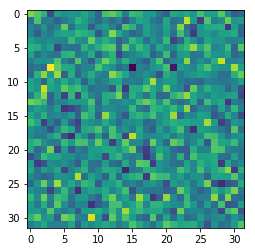

In [51]:
plt.imshow(X_reshape[0])

In [52]:



# In[40]:


#forward pass

#convolution layer
conv1,cache_conv = forward_prop(X_reshape,Wconv1,bconv1,stride,pad)

#relu layer
relu1,cache_relu = forward_relu(conv1)


#forward_pass
relu1_reshape = relu1.reshape(relu1.shape[0],-1)
scores,cache_affine = forward_pass(relu1_reshape,W1,b1)
print(scores.shape)

#softmax loss
loss, dscores = softmax_loss(scores,y)


# In[41]:


#backward prop

# layer backward prop
drelu1_reshape,dW1,db1 = backward_pass(dscores,cache_affine)

# relu backward prop
dout = drelu1_reshape.reshape(1,4,16,16)
dconv1 = backward_relu(dout,cache_relu)

# convolutional layer backward prop
dX_reshape,dWconv1,dbconv1 = backward_prop(dconv1,cache_conv)
dX = dX_reshape.reshape(dX_reshape.shape[0],-1)

print(dX.shape)



(1, 10)
(1, 1024)


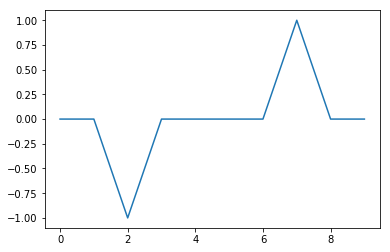

In [53]:
plt.plot(dscores[0])